# Polynomial Regression

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Sample Dataset
### Training Dataset

In [2]:
import pandas as pd

harga_rmh = {'crime': [0.00632, 0.02731, 0.02729, 0.03237, 0.06905], 
         'room': [6.575, 6.421, 7.185, 6.998, 7.147],
         'harga': [24, 21.6, 34.7, 33.4, 36.2]}

train_harga_rmh_df = pd.DataFrame(harga_rmh)
train_harga_rmh_df

,crime,room,harga
0,0.00632,6.575,24.0
1,0.02731,6.421,21.6
2,0.02729,7.185,34.7
3,0.03237,6.998,33.4
4,0.06905,7.147,36.2


Data kali ini awalnya dibentuk dari suatu dictionary yang terdiri dari 3 buah keys yaitu crime, room, dan harga. dimana setiap keys ini akan menampung list yang berisi sekumpulan bilangan.

Alasan mengambil features tersebut untuk mengetahui harga rumah bila diketahui tingkat kejahatan dan rata-rata kamar pada suatu kota.

### Preprocessing Dataset

In [6]:
import numpy as np

X_train = np.array(train_harga_rmh_df['crime']).reshape(-1, 1)
y_train = np.array(train_harga_rmh_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[0.00632]
 [0.02731]
 [0.02729]
 [0.03237]
 [0.06905]]

y_train: [24.  21.6 34.7 33.4 36.2]


Berikutnya juga akan ditampung nilai targetnya kedalam numpy array oleh karena itu perlu melakukan pemanggilan _np.array(train_harga_rmh_df['harga'])_ dimana kolom harga ini merupakan target prediction nya lalu nilai ini akan ditampung kedalam variable y_train.

X_train berupa dalam format array 2 dimensi

y_train berupa dalam format array 1 dimensi

### Polynomial Regression: Quadratic
$y = \alpha + \beta_1x + \beta_2x^2$
#### Polynomial Features

In [7]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[1.0000000e+00 6.3200000e-03 3.9942400e-05]
 [1.0000000e+00 2.7310000e-02 7.4583610e-04]
 [1.0000000e+00 2.7290000e-02 7.4474410e-04]
 [1.0000000e+00 3.2370000e-02 1.0478169e-03]
 [1.0000000e+00 6.9050000e-02 4.7679025e-03]]



Untuk menerapkan polynomial regression pertama perlu melakukan transformasi terhadap feature dari dataset yang sudah dimiliki oleh karena itu perlu pemanggilan _quadratic_feature.fit_transform(X_train)_ selanjutnya akan ditampung kedalam variable X_train_quadratic. X_train_quadratic ini berisi features dari training set kita yang sudah ditransformasikan kedalam polynomial features.

#### Training Model

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

object model diatas akan ditraining dengan memanfaatkan features yang sudah di transformasikan kedalam polynomial. Proses transformasi polynomial nya itu dikenakan pada features dan tidak dikenakan pada target.

### Visualisasi Model

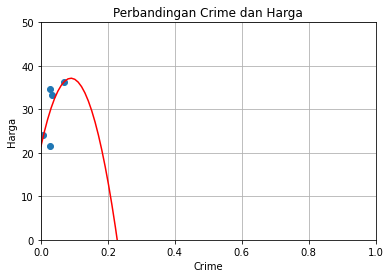

In [14]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 1, 100).reshape(-1, 1) 
X_vis_quadratic = quadratic_feature.transform(X_vis) 
y_vis_quadratic = model.predict(X_vis_quadratic) 

plt.scatter(X_train, y_train) 
plt.plot(X_vis, y_vis_quadratic, '-r') 

plt.title('Perbandingan Crime dan Harga')
plt.xlabel('Crime')
plt.ylabel('Harga')
plt.xlim(0, 1)
plt.ylim(0, 50)
plt.grid(True)
plt.show()

Yang divisualisasikan ada 2 hal yang pertama adalah X_train dan y_train atau datapoint yang kita gunakan untuk melakukan proses trainingnya, untuk data traininnya akan visualisasikan sebagai scatter plot dan akan menghasilkan 5 datapoint, kelima titik diatas merepresentasikan kelima datapoint pada training set. Lalu akan melakukan plotting hasil prediksi dengan plotting dengan warna garis merah.

### Polynomial Regression: Quadratic vs Cubic 

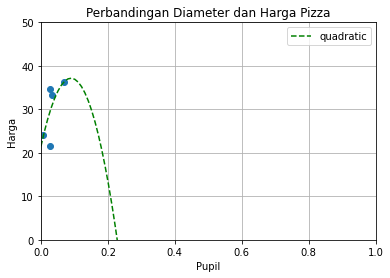

In [17]:
# Training Set
plt.scatter(X_train, y_train) 

# Quadratic
quadratic_featuriser = PolynomialFeatures(degree=2) 
X_train_quadratic = quadratic_feature.fit_transform(X_train) 
model = LinearRegression() 
model.fit(X_train_quadratic, y_train)  
X_vis_quadratic = quadratic_feature.transform(X_vis) 
y_vis = model.predict(X_vis_quadratic) 
plt.plot(X_vis, y_vis, '--g', label='quadratic') 

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Pupil')
plt.ylabel('Harga')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 50)
plt.grid(True)
plt.show()

perbedaan nya hanya pada penerapan polynomial feature dengan derajat 2 lalu melakukan fit transform pada nilai X_train, melakukan proses training, dengan menggunakan features yang sudah menjadi quadratic polynomial, X_vis akan ditransformasikan menjadi quadratic polynomial dan melakukan prediksi